## Summary Compensation Table pay

Following along this tutorial: https://sec-api.io/docs/executive-compensation-api/python-example

In [1]:
from sec_api import ExecCompApi
import config

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
execCompApi = ExecCompApi(config.sec_api_key)

In [4]:
result_ticker = execCompApi.get_data('AAPL')

In [5]:
len(result_ticker)

96

In [6]:
result_ticker[0].keys()

dict_keys(['id', 'cik', 'ticker', 'name', 'position', 'year', 'salary', 'bonus', 'stockAwards', 'optionAwards', 'nonEquityIncentiveCompensation', 'otherCompensation', 'total'])

In [7]:
result_ticker[0].values()

dict_values(['21bce6f864ee3d67e61232da5e371dcc', '320193', 'AAPL', 'Jeff Williams', 'Chief Operating Officer', 2021, 1000000, 0, 21959620, 0, 4000000, 17437, 26977057])

In [8]:
for key in result_ticker[0].keys():
    print(key, result_ticker[0][key])

id 21bce6f864ee3d67e61232da5e371dcc
cik 320193
ticker AAPL
name Jeff Williams
position Chief Operating Officer
year 2021
salary 1000000
bonus 0
stockAwards 21959620
optionAwards 0
nonEquityIncentiveCompensation 4000000
otherCompensation 17437
total 26977057


In [9]:
aapl_mainpay_df = pd.DataFrame(result_ticker)

In [10]:
aapl_mainpay_df.to_csv('old_files/AAPL_SCTpay.csv',index=False)

<AxesSubplot:xlabel='year', ylabel='salary'>

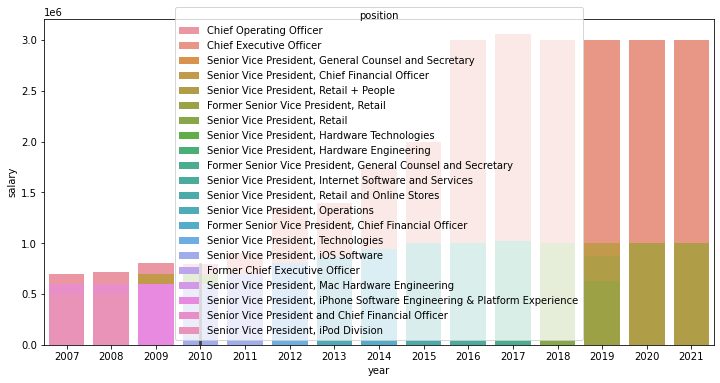

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(data=aapl_mainpay_df,x='year',y='salary',hue='position',dodge=False)

In [12]:
for i in range(0,5):
    print(result_ticker[i]['name'])

Jeff Williams
Tim Cook
Kate Adams
Luca Maestri
Deirdre O Brien


### Let's save the dictionary as a .txt file for later parsing
https://www.geeksforgeeks.org/write-a-dictionary-to-a-file-in-python/

https://stackoverflow.com/questions/4803999/how-to-convert-a-file-into-a-dictionary

https://www.geeksforgeeks.org/how-to-read-dictionary-from-file-in-python/

In [13]:
import json

In [14]:
#saving the dictionary as a text file
with open('old_files/AAPL_SCTpay_2021.txt', 'w') as converted_file:
    converted_file.write(json.dumps(result_ticker))

##### And now the inverse process, reading the file back

In [15]:
#reading the data from a file
with open('old_files/AAPL_SCTpay_2021.txt') as f:
    aapl_txt = f.read()
    
#converting the text string into a dictionary
aapl_dict = json.loads(aapl_txt)

In [16]:
for i in range(0,5):
    print(aapl_dict[i]['name'])

Jeff Williams
Tim Cook
Kate Adams
Luca Maestri
Deirdre O Brien


In [17]:
pd.DataFrame(aapl_dict).columns

Index(['id', 'cik', 'ticker', 'name', 'position', 'year', 'salary', 'bonus',
       'stockAwards', 'optionAwards', 'nonEquityIncentiveCompensation',
       'otherCompensation', 'total',
       'changeInPensionValueAndDeferredEarnings'],
      dtype='object')